In [1]:
import matplotlib.pyplot as plt
import serial
from datetime import datetime
import pandas as pd
import time

In [ ]:
# Define COM port settings
com_port = 'COM7'
baud_rate = 9600

# Connect to the COM port
ser = serial.Serial(com_port, baud_rate)

# Create an empty DataFrame
data = pd.DataFrame(columns=['Time', 'Moisture Sensor 1', 'Moisture Sensor 2'])

# Read data continuously
while True:
    # Read line from the COM port
    line = ser.readline().decode().strip()
    
    # Get current time
    current_time = datetime.now().strftime('%H:%M:%S')
    
    # Split the line into two moisture sensor values
    moisture_values = line.split(',')
    
    # Check if the line contains valid data
    if len(moisture_values) == 2:
        # Extract moisture sensor values
        moisture_sensor_1 = moisture_values[0]
        moisture_sensor_2 = moisture_values[1]
        print(moisture_sensor_1)
        print(moisture_sensor_2)
        
        # Append the data to the DataFrame
        data = data.append({'Time': current_time,
                            'Moisture Sensor 1': moisture_sensor_1,
                            'Moisture Sensor 2': moisture_sensor_2}, ignore_index=True)
        
        # Save the data to an Excel file
        data.to_excel('moisture_data2.xlsx', index=False)
    time.sleep(30)

In [1]:
import pandas as pd
from datetime import datetime
import serial
import time

# Define COM port settings
com_port = 'COM7'
baud_rate = 9600

# Connect to the COM port
ser = serial.Serial(com_port, baud_rate)

# Create an empty DataFrame
data = pd.DataFrame(columns=['Time', 'Moisture Sensor 1', 'Moisture Sensor 2'])

# Variables for averaging
average_counter = 0
moisture_sensor_1_sum = 0
moisture_sensor_2_sum = 0

# Read data continuously
while True:
    # Read line from the COM port
    line = ser.readline().decode().strip()

    # Get current time
    current_time = datetime.now().strftime('%d:%m:%Y %H:%M:%S')  # Change the timestamp format

    # Split the line into two moisture sensor values
    moisture_values = line.split(',')

    # Check if the line contains valid data
    if len(moisture_values) == 2:
        # Extract moisture sensor values
        moisture_sensor_1 = float(moisture_values[0])
        moisture_sensor_2 = float(moisture_values[1])
        
        # Accumulate the sensor values for averaging
        moisture_sensor_1_sum += moisture_sensor_1
        moisture_sensor_2_sum += moisture_sensor_2
        average_counter += 1

        # Check if the average counter reaches 30
        if average_counter == 30:
            # Calculate the average of sensor values
            moisture_sensor_1_avg = moisture_sensor_1_sum / 30
            moisture_sensor_2_avg = moisture_sensor_2_sum / 30

            # Append the averaged data to the DataFrame
            data = data.append({'Time': current_time,
                                'Moisture Sensor 1': moisture_sensor_1_avg,
                                'Moisture Sensor 2': moisture_sensor_2_avg}, ignore_index=True)

            # Reset the averaging variables and counter
            moisture_sensor_1_sum = 0
            moisture_sensor_2_sum = 0
            average_counter = 0

            # Save the data to an Excel file
            data.to_excel('MOISTURE.xlsx', index=False)
    time.sleep(1)  # Adjust the delay as needed


17.40
18.96
       Time Moisture Sensor 1 Moisture Sensor 2
0  17:38:04             17.40             18.96
17.40
18.67
       Time Moisture Sensor 1 Moisture Sensor 2
0  17:38:04             17.40             18.96
1  17:38:05             17.40             18.67
17.20
19.06
       Time Moisture Sensor 1 Moisture Sensor 2
0  17:38:04             17.40             18.96
1  17:38:05             17.40             18.67
2  17:38:06             17.20             19.06
17.40
18.67
       Time Moisture Sensor 1 Moisture Sensor 2
0  17:38:04             17.40             18.96
1  17:38:05             17.40             18.67
2  17:38:06             17.20             19.06
3  17:38:07             17.40             18.67
17.20
19.06
       Time Moisture Sensor 1 Moisture Sensor 2
0  17:38:04             17.40             18.96
1  17:38:05             17.40             18.67
2  17:38:06             17.20             19.06
3  17:38:07             17.40             18.67
4  17:38:08             17.2

17.30
18.38
        Time Moisture Sensor 1 Moisture Sensor 2
0   17:38:04             17.40             18.96
1   17:38:05             17.40             18.67
2   17:38:06             17.20             19.06
3   17:38:07             17.40             18.67
4   17:38:08             17.20             19.06
5   17:38:09             17.40             18.67
6   17:38:10             17.30             18.67
7   17:38:11             17.79             18.96
8   17:38:12             17.50             18.67
9   17:38:13             17.50             18.57
10  17:38:14             17.11             18.38
11  17:38:15             17.40             18.67
12  17:38:16             17.40             18.67
13  17:38:17             17.40             18.67
14  17:38:18             17.89             18.67
15  17:38:19             17.40             18.67
16  17:38:20             17.40             18.57
17  17:38:21             17.30             18.38
17.50
18.57
        Time Moisture Sensor 1 Moisture Senso

17.50
18.67
        Time Moisture Sensor 1 Moisture Sensor 2
0   17:38:04             17.40             18.96
1   17:38:05             17.40             18.67
2   17:38:06             17.20             19.06
3   17:38:07             17.40             18.67
4   17:38:08             17.20             19.06
5   17:38:09             17.40             18.67
6   17:38:10             17.30             18.67
7   17:38:11             17.79             18.96
8   17:38:12             17.50             18.67
9   17:38:13             17.50             18.57
10  17:38:14             17.11             18.38
11  17:38:15             17.40             18.67
12  17:38:16             17.40             18.67
13  17:38:17             17.40             18.67
14  17:38:18             17.89             18.67
15  17:38:19             17.40             18.67
16  17:38:20             17.40             18.57
17  17:38:21             17.30             18.38
18  17:38:22             17.50             18.57
19  17:3

17.40
18.67
        Time Moisture Sensor 1 Moisture Sensor 2
0   17:38:04             17.40             18.96
1   17:38:05             17.40             18.67
2   17:38:06             17.20             19.06
3   17:38:07             17.40             18.67
4   17:38:08             17.20             19.06
5   17:38:09             17.40             18.67
6   17:38:10             17.30             18.67
7   17:38:11             17.79             18.96
8   17:38:12             17.50             18.67
9   17:38:13             17.50             18.57
10  17:38:14             17.11             18.38
11  17:38:15             17.40             18.67
12  17:38:16             17.40             18.67
13  17:38:17             17.40             18.67
14  17:38:18             17.89             18.67
15  17:38:19             17.40             18.67
16  17:38:20             17.40             18.57
17  17:38:21             17.30             18.38
18  17:38:22             17.50             18.57
19  17:3

17.40
18.67
        Time Moisture Sensor 1 Moisture Sensor 2
0   17:38:04             17.40             18.96
1   17:38:05             17.40             18.67
2   17:38:06             17.20             19.06
3   17:38:07             17.40             18.67
4   17:38:08             17.20             19.06
5   17:38:09             17.40             18.67
6   17:38:10             17.30             18.67
7   17:38:11             17.79             18.96
8   17:38:12             17.50             18.67
9   17:38:13             17.50             18.57
10  17:38:14             17.11             18.38
11  17:38:15             17.40             18.67
12  17:38:16             17.40             18.67
13  17:38:17             17.40             18.67
14  17:38:18             17.89             18.67
15  17:38:19             17.40             18.67
16  17:38:20             17.40             18.57
17  17:38:21             17.30             18.38
18  17:38:22             17.50             18.57
19  17:3

16.81
18.18
        Time Moisture Sensor 1 Moisture Sensor 2
0   17:38:04             17.40             18.96
1   17:38:05             17.40             18.67
2   17:38:06             17.20             19.06
3   17:38:07             17.40             18.67
4   17:38:08             17.20             19.06
5   17:38:09             17.40             18.67
6   17:38:10             17.30             18.67
7   17:38:11             17.79             18.96
8   17:38:12             17.50             18.67
9   17:38:13             17.50             18.57
10  17:38:14             17.11             18.38
11  17:38:15             17.40             18.67
12  17:38:16             17.40             18.67
13  17:38:17             17.40             18.67
14  17:38:18             17.89             18.67
15  17:38:19             17.40             18.67
16  17:38:20             17.40             18.57
17  17:38:21             17.30             18.38
18  17:38:22             17.50             18.57
19  17:3

17.40
18.57
        Time Moisture Sensor 1 Moisture Sensor 2
0   17:38:04             17.40             18.96
1   17:38:05             17.40             18.67
2   17:38:06             17.20             19.06
3   17:38:07             17.40             18.67
4   17:38:08             17.20             19.06
5   17:38:09             17.40             18.67
6   17:38:10             17.30             18.67
7   17:38:11             17.79             18.96
8   17:38:12             17.50             18.67
9   17:38:13             17.50             18.57
10  17:38:14             17.11             18.38
11  17:38:15             17.40             18.67
12  17:38:16             17.40             18.67
13  17:38:17             17.40             18.67
14  17:38:18             17.89             18.67
15  17:38:19             17.40             18.67
16  17:38:20             17.40             18.57
17  17:38:21             17.30             18.38
18  17:38:22             17.50             18.57
19  17:3

17.40
18.67
        Time Moisture Sensor 1 Moisture Sensor 2
0   17:38:04             17.40             18.96
1   17:38:05             17.40             18.67
2   17:38:06             17.20             19.06
3   17:38:07             17.40             18.67
4   17:38:08             17.20             19.06
5   17:38:09             17.40             18.67
6   17:38:10             17.30             18.67
7   17:38:11             17.79             18.96
8   17:38:12             17.50             18.67
9   17:38:13             17.50             18.57
10  17:38:14             17.11             18.38
11  17:38:15             17.40             18.67
12  17:38:16             17.40             18.67
13  17:38:17             17.40             18.67
14  17:38:18             17.89             18.67
15  17:38:19             17.40             18.67
16  17:38:20             17.40             18.57
17  17:38:21             17.30             18.38
18  17:38:22             17.50             18.57
19  17:3

SerialException: ClearCommError failed (PermissionError(13, 'The device does not recognize the command.', None, 22))

In [ ]:
data = pd.read_excel('moisture_data.xlsx')

# Extract the columns
time = list(data['Time'])
print(len(time))
time1 = [time[i] for i in range(0, len(time), 5)]
print(len(time1))

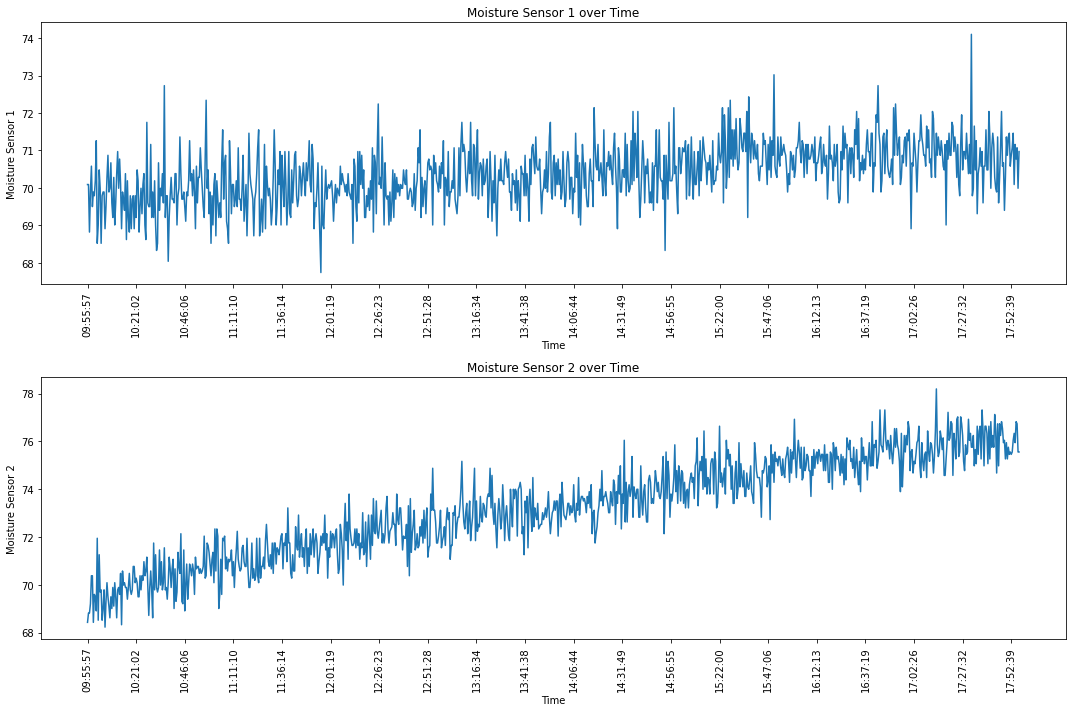

In [2]:

# Read the data from the Excel file
data = pd.read_excel('newmois2.xlsx')

# Extract the columns
time = data['Time']
time1 = [time[i] for i in range(0, len(time), 50)]
moisture1 = data['Moisture Sensor 1']
moisture2 = data['Moisture Sensor 2']

# Calculate the average of moisture1 and moisture2
#average_moisture = (moisture1 + moisture2) / 2
# Plot TOF over Time
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(time, moisture1, label='Moisture Sensor 1')
#plt.axvline(x='13:48:40', color='r', linestyle='--')
plt.xticks(time1, rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('Moisture Sensor 1')
plt.title('Moisture Sensor 1 over Time')

# Plot RSSI over Time
plt.subplot(2, 1, 2)
plt.plot(time, moisture2, label='Moisture Sensor 2')
#plt.axvline(x='13:48:40', color='r', linestyle='--')
plt.xticks(time1, rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('Moisture Sensor 2')
plt.title('Moisture Sensor 2 over Time')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from 0 to 2π
x = np.linspace(0, 2*np.pi, 100)

# Compute corresponding y values for the sine curve
y = np.sin(x)

# Create the plot
plt.plot(x, y, label='Sine Curve')

# Draw the parallel line at x = π/2
plt.axvline(x=np.pi/2, color='r', linestyle='--', label='x = π/2')

# Add labels and a legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine Curve with Parallel Line')
plt.legend()

# Display the plot
plt.show()
